In [2]:
import pandas as pd
#from textblob import TextBlob
#import matplotlib.pyplot as plt

In [57]:
df = pd.read_excel('/Users/Suwani/Desktop/Moodys Project/Sentiment analysis/Vader/2019/nov19_sent_vader.xlsx')

#df[['polarity','subjectivity']] = df['Headline'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))


In [53]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Headline,Date,Year,Month,Day,score,compound,comp_score
0,0,0,"SLFP-SLPP coalition, Sri Lanka Nidahas Podujan...",2019-10-31,2019,10,31,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
1,1,1,4ir and the future of work in Sri Lanka,2019-10-31,2019,10,31,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
2,2,2,“Not bound to uphold any international agreeme...,2019-10-31,2019,10,31,"{'neg': 0.0, 'neu': 0.607, 'pos': 0.393, 'comp...",0.8658,1
3,3,3,2nd T20I : Sri Lanka vs Australia in Brisbane,2019-10-30,2019,10,30,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
4,4,4,Sri Lanka Navy deploys relief teams to high-ri...,2019-10-29,2019,10,29,"{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp...",0.4767,1


In [12]:
a= df.loc[df['Day'] == 1].iloc[:,:-1].mean()

In [13]:
a

Unnamed: 0       492.142857
Unnamed: 0.1     492.142857
Year            2019.000000
Month              2.000000
Day                1.000000
compound           0.078487
dtype: float64

In [58]:
#vader sentiment
dic_p = {}
count = 0
for i in range(1,32):
    mean_comp = df.loc[df['Day'] == i].iloc[:,-2].mean()
    agg_pn = df.loc[df['Day'] == i].iloc[:,-1].sum()
    count += 1
    dic_p[count]=[mean_comp,agg_pn]

In [59]:
df_sent = pd.DataFrame.from_dict(dic_p, orient = 'index', columns = ['MEAN_comp','AGG_Positive'])

In [60]:
df_sent.to_excel('/Users/Suwani/Desktop/Moodys Project/Sentiment analysis/Vader/2019/AGG/nov19_sent_vader_AGG.xlsx')

### Textblob


In [3]:
#textblob
dic_p = {}
count = 0
for i in range(1,32):
    a = df.loc[df['Day'] == i].iloc[:,:-1].sum()
    k = a.iloc[-1]
    count += 1
    dic_p[count]=[k]


In [5]:
df_p  = pd.DataFrame.from_dict(dic_p, orient = 'index', columns = ['AGG_Polarity_score'])


In [6]:
df_p.to_excel('/Users/Suwani/Desktop/Moodys Project/Sentiment analysis/Vader/apr19_aggps.xlsx')

In [2]:
conda install vaderSentiment

Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - vadersentiment

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

ModuleNotFoundError: No module named 'vaderSentiment'

### Line charts


In [13]:
df1 = pd.read_excel('/Users/Suwani/Desktop/Moodys Project/Cleaned data/apr19_aggps.xlsx')

In [14]:
df1.head()

,Day,AGG_Polarity_score,S price
0,1,1.850000,5567.77
1,2,1.367143,5578.43
2,3,4.550909,5597.37
3,4,4.231250,5653.43
4,5,3.269704,5621.36


In [15]:
x1 = df1['Day']
y1 = df1['AGG_Polarity_score']
y2 = df1['S price']

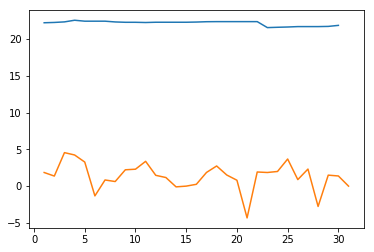

In [28]:
def norm(data):
    return (data)/(max(data)-min(data))


plt.plot(x1,norm(y2))
plt.plot(x1,y1)
plt.show()

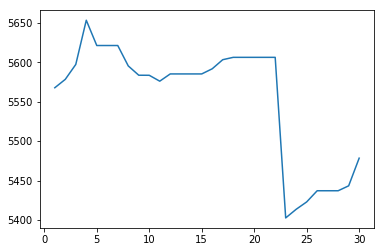

In [18]:
plt.plot(x2,y2, label = 'line2')

No handles with labels found to put in legend.


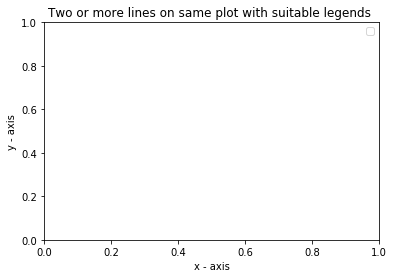

In [19]:
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Two or more lines on same plot with suitable legends ')
plt.legend()
plt.show()